In [224]:
#to install the libraries and packages required 
#before this run, download pip in command line 

!pip install pandas
!pip install sklearn 
!pip install matplotlib
!pip install numpy
!pip install bioinfokit`
!pip install combat
!pip install seaborn

In [420]:
#Data preparation 
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from __future__ import division
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#tranpose and convert first column as header, generate the feature tables
geneaggregate = pd.read_csv('RC_data.csv')
df = geneaggregate[sorted(geneaggregate.columns)]
dfT = df.swapaxes("index", "columns")
new_header = dfT.iloc[0] #grab the first row for the header
featuretable = dfT[1:] #take the data less the header row
featuretable.columns = new_header #set the header row as the df header
featuretable

samples = featuretable.values
sample_names = featuretable.columns
print(featuretable)
# #colouring
# totalrows = len(featuretable.index)
# cancer_patients = featuretable.iloc[1:int(totalrows/2)].values
# noncancer_patients = featuretable.iloc[int(totalrows/2):-1].values

Unnamed: 0              Q9UBE0  Q9BSJ8  P02656 O95741  P09651  P55809  Q15631  \
cancer_cc_patient1_rep1  40914   41185  274731   4969  103836  101089  102971   
cancer_cc_patient1_rep2  45120   42150  284693   5472  118185   97593  110008   
cancer_cc_patient2_rep1  44113  113386  141656   7872  162475  137794  112840   
cancer_cc_patient2_rep2  47835  139305  155864   7957  170174   99304  129621   
cancer_cc_patient3_rep1  26957   35891  161075   6111  101960   88960   92826   
cancer_cc_patient3_rep2  26005   30788  124223   3722   82866   68415   75856   
cancer_cc_patient6_rep1  35712   52750  194500   4094  118675  117222  142954   
cancer_cc_patient6_rep2  30517   33753  166061   3580   83659   85197   92312   
cancer_cc_patient7_rep1  38094   62466  177344   5878   95034   96055   97456   
cancer_cc_patient7_rep2  26654   45894  133566   4066   71776   54583   58171   
cancer_cc_patient8_rep1  48576  113950  121262   5700  175963  122041  114483   
cancer_cc_patient8_rep2  290

In [446]:
#transform data into suitable format for batch correction 
df2 = df.set_index("Unnamed: 0")
df2_logtransformed = np.log2(df2)
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_batchcorrected = pycombat(df2_logtransformed,batch)

#plt.boxplot(df_corrected.transpose())
#plt.show()
df_batchcorrected_T = df_batchcorrected.T
df_batchcorrected_T

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Unnamed: 0,Q9UBE0,Q9BSJ8,P02656,O95741,P09651,P55809,Q15631,Q96EY1,Q16706,Q9UID3,...,P50395,P21283,Q08257,P51161,Q9H2A2,P13010,O95182,P62241,Q14573,Q99436
cancer_cc_patient1_rep1,15.261891,15.120885,18.038296,12.017492,16.528783,16.445190,16.561621,16.411772,15.799947,9.758744,...,18.405452,16.562000,18.628720,17.308034,15.123830,17.612549,15.719732,16.007835,14.220463,15.628695
cancer_cc_patient1_rep2,15.497953,15.529820,18.150705,12.618507,16.929017,16.714625,16.801537,16.583596,16.366595,10.463202,...,18.688335,17.017259,19.083291,17.324651,15.663390,17.838132,16.379401,16.546066,13.282330,15.843931
cancer_cc_patient2_rep1,15.385620,16.770919,16.933262,12.765636,17.294768,16.959425,16.728772,16.168529,16.424491,11.670427,...,19.347907,15.743608,19.206320,15.860449,15.143689,18.505624,16.491129,17.533600,13.558670,16.465482
cancer_cc_patient2_rep2,15.573816,17.083958,17.372370,13.105386,17.396542,16.737107,17.008293,16.410451,16.822171,12.025418,...,19.264426,16.211847,19.607998,16.103718,15.678620,18.689095,16.846228,17.553174,13.766450,16.652416
cancer_cc_patient3_rep1,14.576160,14.896713,17.147580,12.353880,16.497590,16.233003,16.372194,15.588221,16.772132,10.355943,...,19.098558,16.310533,19.978231,15.326957,14.766795,17.997399,15.965843,16.121521,12.584503,16.010178
cancer_cc_patient3_rep2,14.782542,15.121457,17.079209,12.117356,16.473731,16.255145,16.333088,15.649463,16.350529,10.926825,...,18.794364,17.100450,19.822723,15.257468,14.907591,17.995047,16.007752,15.986019,12.556466,15.711479
cancer_cc_patient6_rep1,15.038394,15.524121,17.462149,11.702529,16.757317,16.691000,17.160792,15.765475,16.444417,11.052388,...,18.974288,16.318496,20.254488,15.489748,14.868436,18.311539,15.841342,16.530455,12.874999,16.300697
cancer_cc_patient6_rep2,14.990264,15.240991,17.454246,12.066772,16.485945,16.538912,16.580518,15.815436,16.095301,11.262754,...,18.701159,16.415987,20.113555,15.521877,15.007682,18.094609,16.080465,16.446143,12.854917,16.049570
cancer_cc_patient7_rep1,15.144517,15.799568,17.308101,12.290668,16.377236,16.360390,16.461089,15.487084,16.477755,11.028674,...,18.623409,15.757512,19.792686,15.604300,14.790046,18.057919,16.358697,16.150432,13.066281,16.324340
cancer_cc_patient7_rep2,14.814546,15.640455,17.172902,12.232309,16.289483,15.962975,15.998559,15.650491,16.217439,11.487273,...,18.617412,15.917061,19.708468,15.590775,14.971815,17.907636,15.908900,16.171063,12.728632,16.019315


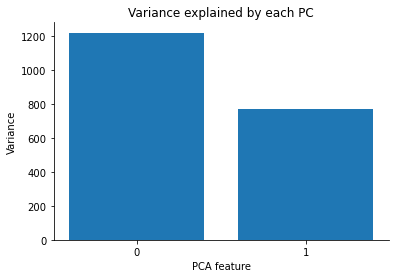

array([1222.0626965 ,  769.09460597])

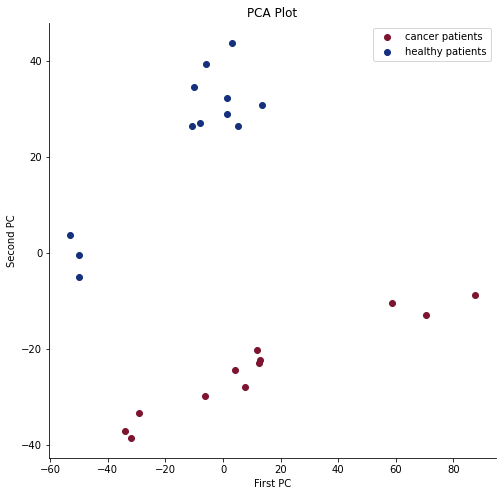

In [182]:
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)

scaler = StandardScaler()
scaler.fit(featuretable)
scaled_df = scaler.transform(featuretable)


pca = PCA(n_components=2)
pca.fit(scaled_df)
scaled_df

#run PCA 
x_pca = pca.transform(scaled_df)
scaled_df.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

xs = x_pca[:,0]
ys = x_pca[:,1]
cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_


## scale the data
samples = featuretable.values.T
sample_names = (featuretable.columns)

scaler = StandardScaler()
scaler.fit(featuretable)
scaled_df = scaler.transform(featuretable)

pca = PCA(n_components=2)
pca.fit(scaled_df)
scaled_df

#run PCA 
scaled_df
x_pca
x_pca = pca.transform(scaled_df)
scaled_df.shape
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.xlabel("First principle component")
plt.ylabel("Second principle component")

In [462]:
#the main aim of this block is to rank the genes based on their loadings in PC1 and 2
loadingsdf = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'],index = featuretable.columns)

#finding highest contributing genes in PC1 
sort_by_PC1 = loadingsdf.sort_values(['PC1'])
print(sort_by_PC1.head(n=6))
print(len(sort_by_PC1))

#finding highest contributing genes in PC2 
sort_by_PC2 = loadingsdf.sort_values(['PC2'])
print(sort_by_PC2.head(n=6))
print(len(sort_by_PC2))

                 PC1       PC2
Unnamed: 0                    
P30041     -0.023955 -0.002514
P26440     -0.023113 -0.007537
Q92817     -0.023100 -0.001868
O43707     -0.022965  0.001870
P49411     -0.022943 -0.010357
O75525     -0.022913 -0.002257
3123
                 PC1       PC2
Unnamed: 0                    
Q96HD9      0.001889 -0.034019
Q9BXK5      0.004372 -0.033947
Q9Y6M9     -0.003945 -0.033636
Q9H2A2     -0.001568 -0.033438
P47985     -0.002525 -0.033336
Q99424     -0.001648 -0.033268
3123


In [422]:
#main aim of this block is to perform z-normalisation through patients: correct way
#apply z-normalisation on transposed featuretable 
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

#z normalise the non-batch corrected data
df_znormalised_bypatients = z_score(featuretable.T)
df_znormalised = df_znormalised_bypatients.T 
df_znormalised

#z normalise the batch corrected data 
df_z_bc_bypatients = z_score(df_batchcorrected)
df_z_bc_bypatients

,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,-0.346859,-0.409382,-0.499211,-0.563704,-0.708811,-0.563079,-0.513503,-0.472609,-0.448889,-0.518835,...,-0.611118,-0.728522,-0.733132,-0.778336,-0.853773,-0.741273,-0.771766,-0.700956,-0.692670,-0.666482
Q9BSJ8,-0.422833,-0.391945,0.287702,0.303772,-0.539444,-0.383019,-0.253348,-0.341100,-0.095716,-0.087726,...,-0.079827,-0.103782,-0.296893,-0.227794,-0.293165,-0.208017,-0.182881,-0.107584,-0.390737,-0.205947
P02656,1.149084,1.042133,0.379920,0.469446,0.649820,0.657106,0.784657,0.819778,0.717615,0.712180,...,0.291082,0.408435,1.073802,0.941727,0.715139,0.702787,0.542172,0.586997,0.756876,0.742582
O95741,-2.094959,-1.984939,-1.987479,-1.981652,-1.882971,-1.979054,-2.300188,-2.006014,-1.987551,-1.866712,...,-1.978595,-1.870295,-1.169311,-1.242841,-1.719597,-1.621854,-1.307367,-1.279425,-1.813544,-1.673388
P09651,0.335750,0.373658,0.585272,0.483331,0.306393,0.335424,0.407150,0.311893,0.215736,0.251053,...,0.324601,0.233301,0.282667,0.255999,0.222843,0.225363,0.310146,0.175832,0.078345,0.103487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,0.919689,0.871101,1.273093,1.225817,1.098829,1.143677,1.239589,1.155656,1.121881,1.095697,...,0.909123,0.873641,0.864840,0.860741,0.913249,0.861813,1.080638,1.026210,1.073946,0.997276
O95182,-0.100171,0.072923,0.128769,0.167212,0.025440,0.087857,-0.083445,0.099214,0.205741,0.052396,...,0.739976,0.696628,0.795489,0.793642,0.653122,0.704423,0.657419,0.679818,0.863279,0.786876
P62241,0.055061,0.164117,0.720939,0.573306,0.107693,0.076310,0.285643,0.291016,0.093454,0.189240,...,0.230833,0.249202,-0.099574,-0.091958,0.097633,0.080004,0.144439,0.175297,-0.120971,-0.043506


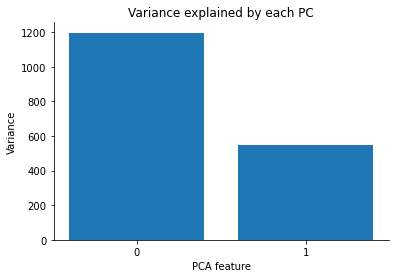

array([1196.56651311,  546.20022547])

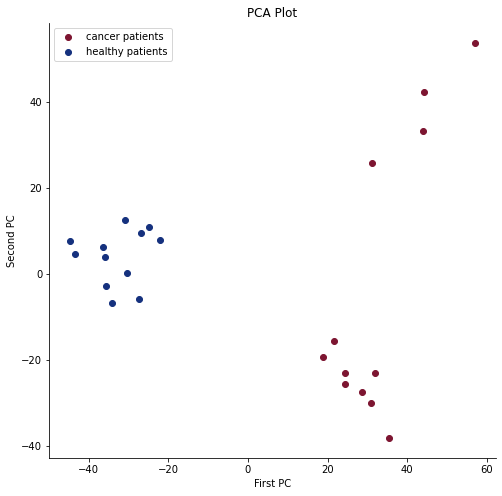

In [423]:
#perform pca plot on batch corrected data by batches 
#pca plot for batch corrected data 
#tranpose the z-normalised batch corrected data 
df_z_bc_bypatients_T = df_z_bc_bypatients.T
#scale the batch corrected data
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_z_bc_bypatients_T)
scaled_df_bc_znormalised = scaler.transform(df_z_bc_bypatients_T)

pca = PCA(n_components=2)
pca.fit(scaled_df_bc_znormalised)
scaled_df_bc_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_bc_znormalised)
scaled_df.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

xs = x_pca[:,0]
ys = x_pca[:,1]
cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)

plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

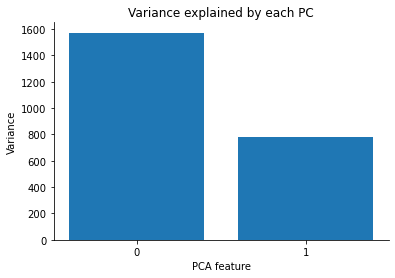

array([1571.73932434,  780.51036153])

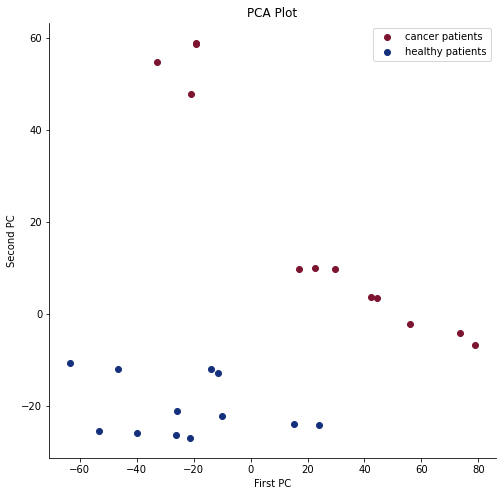

In [424]:
#scale the data
#samples = featuretable.values.T
#sample_names = (featuretable.columns)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = StandardScaler()
scaler.fit(df_znormalised)
scaled_df_znormalised = scaler.transform(df_znormalised)

pca = PCA(n_components=2)
pca.fit(scaled_df_znormalised)
scaled_df_znormalised

#run PCA 
x_pca = pca.transform(scaled_df_znormalised)
scaled_df.shape

#observe variance explained byeach PC in a bar chart 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Variance explained by each PC")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

#plot first two PCs in a scatter plot and separate c/non-c
plt.figure(figsize=(8,8))
plt.xlabel("First PC")
plt.ylabel("Second PC")

xs = x_pca[:,0]
ys = x_pca[:,1]
cancer = plt.scatter(xs[0:12], ys[0:12], c = "#7D1531", label = "cancer patients")
non_cancer = plt.scatter(xs[12:], ys[12:], c = "#15317E", label = "healthy patients")
# label_color = ["#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E","#7D1531","#15317E"]
# batch1 = plt.scatter(xs[0:12], ys[0:12], c = label_color)
# batch2 = plt.scatter(xs[12:], ys[12:], c = label_color)


plt.legend()
plt.title("PCA Plot")
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.show
pca.explained_variance_

In [425]:
#the main aim of this block is to rank the genes based on their loadings in PC1 and 2 (for z normalised data)
loadingsdf = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'],index = featuretable.columns)

#finding highest contributing genes in PC1 
sort_by_PC1 = loadingsdf.sort_values(['PC1'])
print(sort_by_PC1.head(n=6))
print(len(sort_by_PC1))

#finding highest contributing genes in PC2 
sort_by_PC2 = loadingsdf.sort_values(['PC2'])
print(sort_by_PC2.head(n=6))
print(len(sort_by_PC2))

                 PC1       PC2
Unnamed: 0                    
P30041     -0.023955 -0.002514
P26440     -0.023113 -0.007537
Q92817     -0.023100 -0.001868
O43707     -0.022965  0.001870
P49411     -0.022943 -0.010357
O75525     -0.022913 -0.002257
3123
                 PC1       PC2
Unnamed: 0                    
Q96HD9      0.001889 -0.034019
Q9BXK5      0.004372 -0.033947
Q9Y6M9     -0.003945 -0.033636
Q9H2A2     -0.001568 -0.033438
P47985     -0.002525 -0.033336
Q99424     -0.001648 -0.033268
3123


In [449]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
new_df = df_znormalised.T
#convert the genes into an array 
genearray = df_znormalised.columns.values

#convert samples into an array 
samplearray = df_znormalised.index.values

#obtain the numpy array 
numpyarray = new_df.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count = 0
#for storage of DEG 
ttest_deg = []

#for storage of p values for subseuquent bonferroni correction
ttest_pvalue = []
for i in np.arange(len(genearray)):
    ttest = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    count += 1 
    ttest_pvalue.append(ttest.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest.pvalue < alpha_value: 
        ttest_deg.append(genearray[i]) #print out significant genes 
print(ttest_deg)
print(len(ttest_deg))

['Q9UBE0', 'Q9BSJ8', 'P09651', 'P55809', 'Q15631', 'Q16706', 'O14548', 'P80723', 'P41252', 'O60443', 'Q86VP6', 'O43865', 'P21980', 'P05388', 'P17948', 'Q96EK6', 'P50990', 'Q14315', 'P14868', 'P00325', 'P16870', 'P17096', 'Q15029', 'P50453', 'P08123', 'Q9BQ69', 'O15460', 'Q9UK45', 'Q07812', 'P07093', 'Q8IZQ5', 'Q16181', 'O43583', 'Q8IV36', 'Q6L8Q7', 'P49257', 'P35241', 'P00403', 'O75533', 'O75947', 'Q9C002', 'P84157', 'Q63HN8', 'Q08426', 'Q9NRK6', 'P16144', 'O60925', 'P01714', 'P51571', 'P51687', 'O75306', 'P31040', 'P17174', 'P56470', 'Q9UNM6', 'P09874', 'Q99832', 'P02452', 'Q5JTV8', 'O15127', 'Q8TBP6', 'O75390', 'Q99460', 'P48507', 'Q9BRP8', 'P61247', 'Q08174', 'P22033', 'Q9HD67', 'A6ND91', 'P49591', 'P49585', 'Q8TBC4', 'Q9H3K2', 'Q15427', 'P42765', 'Q9UJ83', 'P02748', 'Q4KMP7', 'Q9BUQ8', 'P11413', 'Q8IYB8', 'Q969H8', 'Q9BV20', 'Q07020', 'Q15437', 'P55036', 'Q53FZ2', 'O43813', 'P35558', 'P42704', 'O43895', 'P62312', 'Q9Y5P6', 'P55735', 'Q8NBQ5', 'P13674', 'P55285', 'P53041', 'Q14254',

In [450]:
#this block performs the mannwhitneyu test to extract differentially expressed genes
from scipy.stats import mannwhitneyu

mann_deg = []
for i in np.arange(len(genearray)):
    count = 0
    mannwhitneytest = mannwhitneyu(numpyarray[i,0:12],numpyarray[i,12:24])
    
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if mannwhitneytest.pvalue < alpha_value:
        mann_deg.append(genearray[i])
print(mann_deg)
print(len(mann_deg))

['Q9UBE0', 'Q9BSJ8', 'P09651', 'P55809', 'Q15631', 'Q16706', 'O14548', 'P80723', 'P41252', 'O60443', 'Q86VP6', 'O43865', 'P21980', 'P17948', 'Q96EK6', 'P50990', 'Q14315', 'P14868', 'P00325', 'P16870', 'P17096', 'Q15029', 'O43570', 'P50453', 'P08123', 'Q9BQ69', 'O15460', 'Q9UK45', 'Q07812', 'P07093', 'Q8IZQ5', 'Q16181', 'O43583', 'Q8IV36', 'Q6L8Q7', 'P49257', 'P35241', 'P00403', 'O75533', 'O75947', 'Q9C002', 'P84157', 'Q63HN8', 'Q08426', 'Q9NRK6', 'P16144', 'O60925', 'P01714', 'P51571', 'P51687', 'O75306', 'P31040', 'P17174', 'P56470', 'Q9UNM6', 'P09874', 'Q99832', 'P02452', 'Q5JTV8', 'O15127', 'Q8TBP6', 'O75390', 'Q99460', 'P48507', 'Q9BRP8', 'P61247', 'Q08174', 'P22033', 'A6ND91', 'P49591', 'P49585', 'Q8TBC4', 'Q9H3K2', 'Q15427', 'P42765', 'Q9UJ83', 'P02748', 'Q4KMP7', 'Q9BUQ8', 'P11413', 'Q969H8', 'Q9BV20', 'Q07020', 'Q5SSJ5', 'Q15437', 'Q8TEK3', 'P55036', 'Q53FZ2', 'O43813', 'P35558', 'P42704', 'O43895', 'P62312', 'Q9Y5P6', 'P55735', 'Q8NBQ5', 'P13674', 'P55285', 'O43852', 'P53041',

In [451]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
ttest_deg_corrected = []
ttest_pvalue_corrected = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray)):
    ttest_corrected = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    ttest_pvalue_corrected.append(ttest_corrected.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_corrected.pvalue < corrected_alphavalue: 
        ttest_deg_corrected.append(genearray[i]) #print out significant genes 

print(ttest_deg_corrected)
print(len(ttest_deg_corrected))

['Q16706', 'O14548', 'O43865', 'Q15029', 'P50453', 'Q9BQ69', 'Q07812', 'Q16181', 'P49257', 'P00403', 'O75947', 'Q08426', 'P51571', 'P51687', 'Q99832', 'P02452', 'Q5JTV8', 'P22033', 'P42765', 'Q4KMP7', 'Q07020', 'Q15437', 'P42704', 'P62312', 'P55735', 'P13674', 'O00483', 'P51606', 'P27694', 'P05198', 'P05026', 'O94906', 'P04004', 'P12956', 'O96009', 'O75874', 'P36871', 'P60174', 'Q14376', 'P38159', 'P37802', 'O94855', 'O60240', 'Q9BUP3', 'Q16775', 'Q86WU2', 'Q68CK6', 'Q96AB3', 'P10809', 'Q8NE62', 'Q8NEY4', 'P38117', 'Q9UF12', 'Q8IUR0', 'P47985', 'P40306', 'Q12907', 'Q5VWZ2', 'Q03154', 'P18077', 'Q96DC8', 'Q15046', 'O95816', 'P00918', 'O60869', 'Q9UI12', 'P28065', 'P82909', 'Q695T7', 'P20674', 'Q9UHK6', 'O43143', 'P06454', 'Q92506', 'P23786', 'Q13228', 'Q9UL12', 'P63279', 'P00387', 'P22102', 'Q09666', 'Q9HCC0', 'Q13442', 'Q13177', 'Q16698', 'P31146', 'P61026', 'O00487', 'O75131', 'P0CW27', 'P11310', 'Q13724', 'P54577', 'P21266', 'P61088', 'Q96TA1', 'Q9NR45', 'P30626', 'Q9NUJ1', 'P00740',

In [429]:
#this block prepares the dictionaries for gene mapping 
pathway_gene = {}
pathway_source = {}

with open('c5.gobp.txt') as f:
    for line in f:
        genepathway = line.split()[0]
        source = line.split()[1]
        gene_symbols = line.split()[2:]
        pathway_source[genepathway] = source
        pathway_gene[genepathway] = gene_symbols

In [452]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required ss
#hypo_M = len(pathway_gene) #total number of genes 
#hypo_N = len(ttest_deg_corrected) #total number of DEGs

#create a dictionary to store the number of differentially expressed genes 
pathway_DEGs = {} 
#obtain the number of DEGs in pathway 
for pathway in pathway_gene.keys():
    counts = 0
    for degs in ((ttest_deg_corrected)):
        if degs in pathway_gene[pathway]:
            counts += 1          
            pathway_DEGs[genepathway] = counts

In [431]:
for pathway in pathway_gene.keys():
    hypo_N = 0
    for degs in ttest_deg_corrected:
        if degs in pathway_gene[pathway]:
            hypo_N += 1          
            print(hypo_N)

In [453]:
#this block manages the converted genes 
#turn the converted genes to a dataframe
converted_genes = pd.read_csv('converted genes.txt', sep = '\t')
converted_genes.to_numpy()
converted_genes

#sort the converted genes
sortedgenes = converted_genes.sort_values('From')
sortedgenes

#retain the unique genes symbols and converts it into a list
uniquegenesarray = sortedgenes.drop_duplicates(subset=['From'])
uniquegenesSym = uniquegenesarray["To"].tolist()
uniquegenesFrom = uniquegenesarray["From"].tolist()

In [458]:
#d1 = list(uniquegenes.values() )
#d1 = [ i for s in d1 for i in s ]

#this block drops the columns that are not mapped
for g in df_znormalised.columns:
    if g not in uniquegenesFrom:
        del df_znormalised[g]

df_znormalised_sorted = df_znormalised[sorted(df_znormalised.columns)]
df_znormalised_sorted
df_znormalised_sorted.shape

#rename the columns 
df_znormalised_sorted.columns = uniquegenesSym
df_znormalised_sorted

,RBM47,FER1L5,UBA6,ESYT2,SHTN1,SLC5A10,ILVBL,NBAS,FUOM,VWA8,...,TEX264,OAS3,IGF2BP2,NDUFB9,SQOR,USH1C,SLC4A4,SCIN,WASF2,SEC23IP
cancer_cc_patient1_rep1,-0.265619,-0.211037,-0.0320766,-0.212507,-0.271114,0.315394,-0.250774,-0.29019,-0.296139,-0.166206,...,-0.292651,-0.26514,-0.293331,-0.178242,-0.066465,-0.254514,-0.173506,0.032768,-0.245881,-0.182405
cancer_cc_patient1_rep2,-0.302102,-0.288925,-0.036475,-0.239409,-0.311661,0.338534,-0.279512,-0.331017,-0.339291,-0.180265,...,-0.335595,-0.306081,-0.334067,-0.208323,-0.0676822,-0.292311,-0.20091,-0.0535014,-0.280268,-0.199999
cancer_cc_patient2_rep1,-0.378474,-0.281831,-0.077672,-0.205153,-0.353254,-0.070888,-0.370049,-0.383609,-0.422974,-0.209585,...,-0.415584,-0.329971,-0.423204,-0.257841,0.312573,-0.371367,-0.221872,0.623471,-0.318407,-0.242188
cancer_cc_patient2_rep2,-0.380334,-0.302821,-0.0707307,-0.199177,-0.387507,-0.0949738,-0.370572,-0.385197,-0.422684,-0.21973,...,-0.41256,-0.319165,-0.422693,-0.261218,0.325559,-0.373395,-0.236401,0.503491,-0.314092,-0.257062
cancer_cc_patient3_rep1,-0.212371,-0.169364,-0.052183,-0.169897,-0.216189,0.0760718,-0.209046,-0.230381,-0.23432,-0.138568,...,-0.232355,-0.203154,-0.23232,-0.141609,-0.00016752,-0.205414,-0.118432,-0.0667091,-0.180275,-0.1683
cancer_cc_patient3_rep2,-0.204864,-0.135362,-0.0435325,-0.159453,-0.204815,0.144483,-0.195208,-0.215898,-0.217874,-0.141681,...,-0.216878,-0.195622,-0.218781,-0.146809,0.0515394,-0.188676,-0.117477,-0.0629536,-0.170855,-0.146742
cancer_cc_patient6_rep1,-0.310117,-0.192325,-0.144619,-0.253618,-0.313799,0.255016,-0.309522,-0.332936,-0.343693,-0.200729,...,-0.339449,-0.312279,-0.343288,-0.213049,0.022356,-0.290541,-0.192371,0.0875755,-0.275238,-0.221357
cancer_cc_patient6_rep2,-0.242256,-0.0905385,-0.11272,-0.196086,-0.236651,0.170961,-0.232391,-0.256897,-0.261223,-0.1521,...,-0.259124,-0.242631,-0.261128,-0.165271,0.0118134,-0.2229,-0.142133,-0.0156389,-0.213879,-0.186492
cancer_cc_patient7_rep1,-0.274832,-0.0844298,-0.11725,-0.183115,-0.250802,0.477528,-0.292389,-0.305582,-0.30955,-0.20677,...,-0.317313,-0.289382,-0.318676,-0.184605,-0.0937805,-0.282662,-0.176335,0.130037,-0.250499,-0.213362
cancer_cc_patient7_rep2,-0.252819,-0.0854614,-0.112239,-0.193442,-0.259571,0.539833,-0.262101,-0.272498,-0.277168,-0.178239,...,-0.282992,-0.266013,-0.284007,-0.17683,-0.0970344,-0.253158,-0.159101,0.0587286,-0.216124,-0.195258


In [461]:
#this block performs the students' t-test to extract the differentially expressed genes 
from scipy import stats
##obtain each of the array 
#convert the genes into an array 
genearray = df_znormalised_sorted.columns.values

#convert samples into an array 
samplearray = df_znormalised_sorted.index.values

#obtain the numpy array 
new_df_sorted = df_znormalised_sorted.T
numpyarray = new_df_sorted.to_numpy() 

#set the alpha value 
alpha_value = 0.05 
count = 0
#for storage of DEG 
ttest_deg_sorted = []

#for storage of p values for subseuquent bonferroni correction
ttest_pvalue = []
for i in np.arange(len(genearray)):
    ttest = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    count += 1 
    ttest_pvalue.append(ttest.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest.pvalue < alpha_value: 
        ttest_deg_sorted.append(genearray[i]) #print out significant genes 
print(ttest_deg_sorted)
print(len(ttest_deg_sorted))

['FER1L5', 'UBA6', 'ESYT2', 'NBAS', 'VWA8', 'WDR91', 'ASPDH', 'PALM3', 'PGP', 'DRGX', 'C2CD4D', 'C19orf81', 'DNASE2', 'AGPS', 'TK2', 'PDLIM1', 'ACOT7', 'MYO1C', 'STXBP3', 'AP3B1', 'NDUFS8', 'PSMD11', 'PSMD12', 'CLIC1', 'EIF3F', 'PDHX', 'QSOX1', 'SAP18', 'PLOD2', 'HMGN4', 'NDUFA4', 'PSMD14', 'LAD1', 'CHL1', 'SDCBP', 'NOP56', 'DDX3X', 'PODXL', 'CES2', 'MAN2B1', 'FBP2', 'CUX2', 'COX7A2L', 'GAPDHS', 'HSPB6', 'COPE', 'AP3D1', 'CCS', 'PDCD5', 'SLC9A3R1', 'NRP1', 'TNPO2', 'APOL1', 'PSMA7', 'SCAMP3', 'PHYH', 'OPLAH', 'BCKDK', 'IFIT3', 'TAX1BP3', 'UBE2L6', 'UQCRQ', 'UQCR11', 'HGS', 'PPP1R12A', 'SLC27A2', 'XPO1', 'ZNF609', 'SPTBN2', 'SEC16A', 'SYNM', 'ERC2', 'SCAMP1', 'SCAMP2', 'ARPC1B', 'ARPC3', 'PFDN6', 'PMM2', 'HMGB3', 'NCAM2', 'ABCC4', 'P4HA2', 'ARPC5', 'TAPBP', 'FABP7', 'DHX15', 'CYB5B', 'PHGDH', 'NDUFS4', 'ARHGAP6', 'DYNC1LI2', 'SRGAP3', 'HSPA12A', 'HNRNPR', 'TXNL1', 'TPD52L2', 'SYNJ1', 'MGAM', 'HTRA2', 'AKR7A2', 'EPB41L2', 'TGOLN2', 'LAMTOR5', 'DENR', 'DNPH1', 'TRAPPC3', 'ZNF207', 'NDUFB3

In [435]:
#this block performs the bonferroni correction for differentially expressed genes obtained from the ttest manually without a module 
#approach 1: divide the per analysis alpha rate by the number of statistical analyses performed 
ttest_deg_corrected_sorted = []
ttest_pvalue_corrected_sorted = []

analyses_performed = 3123 
corrected_alphavalue = 0.05/analyses_performed

for i in np.arange(len(genearray)):
    ttest_corrected_sorted = stats.ttest_ind(numpyarray[i,0:12],numpyarray[i,12:24])
    ttest_pvalue_corrected_sorted.append(ttest_corrected.pvalue)
#check against the alpha value for significance [pvalues that are lesser than the alpha value]
    if ttest_corrected_sorted.pvalue < corrected_alphavalue: 
        ttest_deg_corrected_sorted.append(genearray[i]) #print out significant genes 

print(ttest_deg_corrected_sorted)
print(len(ttest_deg_corrected_sorted))

['UBA6', 'PDLIM1', 'NDUFS8', 'PDHX', 'NDUFA4', 'PSMD14', 'CHL1', 'DDX3X', 'FBP2', 'COX7A2L', 'PDCD5', 'SLC9A3R1', 'PSMA7', 'UQCRQ', 'PMM2', 'DHX15', 'NDUFS4', 'DYNC1LI2', 'HTRA2', 'NDUFA2', 'MYO1B', 'NUDT21', 'AHCYL1', 'NDUFS5', 'PLIN1', 'SPAG9', 'REV3L', 'EDF1', 'NOL3', 'CPNE3', 'COQ9', 'NDUFS7', 'PDCD6', 'ATP6V1G1', 'NDUFS6', 'NDUFS3', 'BANF1', 'EIF3G', 'IDH1', 'BBOX1', 'ATP5PD', 'ATP5MG', 'GLRX3', 'DDAH1', 'TOMM70', 'SEC24D', 'PRPF6', 'GLS', 'CEP152', 'AKR7A3', 'NDUFA7', 'NDUFA10', 'PGM3', 'HSPA4L', 'BAG2', 'AIFM1', 'EML2', 'NDUFB10', 'NAPSA', 'ADH1C', 'LDHA', 'GLUD1', 'CYB5R3', 'GSR', 'MT-CO2', 'PAH', 'PNP', 'PGK1', 'F9', 'CA2', 'ASS1', 'A2M', 'COL1A1', 'COL4A1', 'CRYAA', 'C1QB', 'TFRC', 'VTN', 'CAT', 'APOB', 'GAPDH', 'GNAI2', 'ATP1A1', 'ATP1B1', 'ALDOB', 'ALDH2', 'SLC25A5', 'PCCA', 'PCCB', 'EIF2S1', 'SERPINA7', 'PTMA', 'ATP5F1B', 'GPI', 'EPHX1', 'DBI', 'FABP1', 'LDHB', 'BPGM', 'FH', 'CD14', 'COL4A2', 'ENO2', 'ACAA1', 'GSTA2', 'LGALS1', 'QDPR', 'FBP1', 'ANXA4', 'CTSH', 'COX6C', 'CC

In [454]:
#this block prepares the dictionaries for gene mapping from the pathway file
pathway_gene = {}
pathway_source = {}

with open('c5.gobp.txt') as f:
    for line in f:
        genepathway = line.split()[0]
        source = line.split()[1]
        gene_symbols = line.split()[2:]
        pathway_source[genepathway] = source
        pathway_gene[genepathway] = gene_symbols

In [457]:
#mapping genes to the pathway using the hypergeometric test 
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

#parameters required 
hypo_M = len(pathway_gene) #total number of genes 
hypo_N = len(ttest_deg_corrected_sorted) #total number of DEGs

#obtaining n value (number of DEGs in pathway)
pathway_DEGs = {}
for pathway in pathway_gene.keys():
    hyper_n = 0
    for degs in ttest_deg_corrected_sorted:
        if degs in pathway_gene[pathway]:
            hyper_n += 1
#store the number of DEGs in pathway into a dictionary 
        pathway_DEGs[pathway] = hyper_n
#sort the dictionary to locate the highest most enriched pathway 
pathway_DEGs_sorted = dict(sorted(pathway_DEGs.items(), key=lambda item: item[1], reverse=True))
print(pathway_DEGs_sorted)

{'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS': 196, 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS': 149, 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY': 107, 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS': 102, 'GOBP_INTRACELLULAR_TRANSPORT': 97, 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION': 93, 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION': 90, 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION': 88, 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS': 84, 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS': 83, 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS': 82, 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS': 81, 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS': 81, 'GOBP_LIPID_METABOLIC_PROCESS': 79, 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS': 74, 'GOBP_ATP_METABOLIC_PROCESS': 73, 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS': 72, 'GOBP_PROTEOLYSIS': 70, 'GOBP_APOPTOTIC_PROCESS': 68, 'GOBP_HOMEOSTATIC_PROCESS': 68, 'GOBP_TRANSMEMBRANE_TRANSPORT': 68, 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_AS

0
24
0
2
0
0
2
2
7
1
3
0
0
3
5
0
1
7
1
3
0
8
0
0
29
0
9
0
2
7
0
14
0
10
2
6
2
0
3
2
29
2
3
0
0
3
11
0
0
0
20
4
3
4
0
0
0
0
1
0
4
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
5
0
2
3
0
2
0
3
0
21
14
6
0
13
1
5
1
1
1
1
0
0
5
0
0
1
6
0
4
7
1
0
2
2
0
0
0
0
0
0
0
1
0
1
0
0
5
10
1
7
0
13
0
0
8
6
0
0
0
6
0
2
2
0
0
0
0
0
1
2
13
0
0
1
0
0
3
2
0
1
0
2
3
60
2
0
0
0
0
1
2
0
23
5
16
1
0
1
1
0
0
0
0
0
6
7
0
0
2
0
2
1
0
0
1
1
1
0
0
3
2
2
12
1
6
4
2
1
2
1
0
1
1
1
0
28
17
4
1
3
1
21
0
0
3
1
2
0
0
0
1
1
2
0
1
0
0
0
0
0
0
0
17
0
0
0
0
0
2
2
5
0
0
3
1
0
0
0
0
0
2
0
0
0
0
0
0
0
0
3
3
0
0
0
0
0
1
0
0
0
0
0
0
7
0
2
4
15
7
4
0
2
2
0
14
0
11
0
0
10
1
56
26
2
5
45
46
0
0
4
0
0
0
0
0
3
1
0
0
1
0
1
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
3
2
0
0
1
0
1
0
0
3
1
3
0
3
46
40
8
2
3
0
6
0
0
0
13
0
0
1
0
5
0
0
0
27
9
0
0
1
1
1
0
1
1
0
0
4
4
1
0
1
1
1
0
0
0
2
0
2
0
0
0
0
0
0
0
0
50
7
38
5
1
3
3
1
2
0
0
0
12
3
4
2
0
2
4
1
3
4
1
2
0
2
1
0
1
1
1
0
0
0
0
0
0
3
2
1
11
0
0
2
0
2
19
0
0
0
0
0
0
11
10
1
7
4
0
4
0
0
0
0
0
0
24
4
17
1
1
1
0


In [199]:
pgene = list(pathway_gene.values())
pgene[1:5]
pgene =[j for i in pgene for j in i]
pgene = list(dict.fromkeys(pgene))

In [279]:
ttest

Ttest_indResult(statistic=3.29479908199158, pvalue=0.0033025614151336214)

In [440]:
len([  i for i in ttest_deg_corrected_sorted if i in pgene ])

488

In [201]:
len(ttest_deg_corrected_sorted)

505

In [456]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
#this obtains the hypergeometric test values and stores in a dictionary
pathway_hypertest = {}
hyper_M = len(pathway_gene) #total number of genes 
hyper_N = len(ttest_deg_corrected_sorted) #total number of DEGs
x = np.arange(0, hyper_n+1)

for key, value in pathway_DEGs_sorted.items():
    hyper_n = value
    res = hypergeom.cdf(x, hyper_M, hyper_n, hyper_N)
    pathway_hypertest[key] = res[0]
    
print(pathway_hypertest)

{'GOBP_SMALL_MOLECULE_METABOLIC_PROCESS': 9.31078168972656e-07, 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS': 2.6939741984584302e-05, 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY': 0.0005347366620633592, 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS': 0.0007622951032648822, 'GOBP_INTRACELLULAR_TRANSPORT': 0.0010864211675032792, 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION': 0.0014421836693938215, 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION': 0.0017833724617528715, 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION': 0.002054478019121664, 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS': 0.002726269089221564, 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS': 0.0029260030062718792, 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS': 0.003140338880695181, 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS': 0.0033703419458482363, 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS': 0.0033703419458482363, 'GOBP_LIPID_METABOLIC_PROCESS': 0.0038820039381025277, 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS':

In [444]:
#filter and obtain enriched pathways 
enriched_pathways = {}
for key, value in pathway_hypertest.items(): 
    if value <0.05:
        enriched_pathways[key] = value 

print(enriched_pathways.keys())
print(len(enriched_pathways.keys()))

dict_keys(['GOBP_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ORGANIC_ACID_METABOLIC_PROCESS', 'GOBP_GENERATION_OF_PRECURSOR_METABOLITES_AND_ENERGY', 'GOBP_ORGANONITROGEN_COMPOUND_BIOSYNTHETIC_PROCESS', 'GOBP_INTRACELLULAR_TRANSPORT', 'GOBP_ESTABLISHMENT_OF_PROTEIN_LOCALIZATION', 'GOBP_PROTEIN_CONTAINING_COMPLEX_SUBUNIT_ORGANIZATION', 'GOBP_CELLULAR_MACROMOLECULE_LOCALIZATION', 'GOBP_MONOCARBOXYLIC_ACID_METABOLIC_PROCESS', 'GOBP_ORGANOPHOSPHATE_METABOLIC_PROCESS', 'GOBP_CELLULAR_AMIDE_METABOLIC_PROCESS', 'GOBP_SMALL_MOLECULE_CATABOLIC_PROCESS', 'GOBP_CARBOHYDRATE_DERIVATIVE_METABOLIC_PROCESS', 'GOBP_LIPID_METABOLIC_PROCESS', 'GOBP_NUCLEOBASE_CONTAINING_SMALL_MOLECULE_METABOLIC_PROCESS', 'GOBP_ATP_METABOLIC_PROCESS', 'GOBP_ORGANONITROGEN_COMPOUND_CATABOLIC_PROCESS', 'GOBP_PROTEOLYSIS', 'GOBP_APOPTOTIC_PROCESS', 'GOBP_HOMEOSTATIC_PROCESS', 'GOBP_TRANSMEMBRANE_TRANSPORT', 'GOBP_CELLULAR_PROTEIN_CONTAINING_COMPLEX_ASSEMBLY', 'GOBP_RESPONSE_TO_OXYGEN_CONTAINING_COMPOUND', 'GOBP_INTRACELLULAR_PR

In [179]:
#perform batch correction 
featuretable



Unnamed: 0,Q9UBE0,Q9BSJ8,P02656,O95741,P09651,P55809,Q15631,Q96EY1,Q16706,Q9UID3,...,P50395,P21283,Q08257,P51161,Q9H2A2,P13010,O95182,P62241,Q14573,Q99436
cancer_cc_patient1_rep1,40914,41185,274731,4969,103836,101089,102971,92750,66723,1011,...,375745,104892,468298,160322,42805,219862,67041,75779,19285,57186
cancer_cc_patient1_rep2,45120,42150,284693,5472,118185,97593,110008,93422,74885,1241,...,397595,126349,486071,165311,44656,217378,72618,86028,9108,53835
cancer_cc_patient2_rep1,44113,113386,141656,7872,162475,137794,112840,79844,99927,3380,...,680440,63593,678865,65667,43342,382306,107180,198237,12929,92997
cancer_cc_patient2_rep2,47835,139305,155864,7957,170174,99304,129621,81800,105634,4129,...,617383,67945,723119,64751,45178,417187,104060,185249,13245,101256
cancer_cc_patient3_rep1,26957,35891,161075,6111,101960,88960,92826,55847,125118,1474,...,581510,89942,1115051,47259,34210,279052,77867,81408,7177,71378
cancer_cc_patient3_rep2,26005,30788,124223,3722,82866,68415,75856,45622,73982,1773,...,431137,134710,850757,33815,25084,245144,54533,56156,5195,48542
cancer_cc_patient6_rep1,35712,52750,194500,4094,118675,117222,142954,62290,101223,2288,...,537714,90381,1331752,52249,36464,338998,72188,105342,8554,84505
cancer_cc_patient6_rep2,30517,33753,166061,3580,83659,85197,92312,51818,61013,2296,...,401509,79514,1060288,41425,27075,264573,57676,79724,6544,63219
cancer_cc_patient7_rep1,38094,62466,177344,5878,95034,96055,97456,52474,103429,2254,...,431058,64136,989674,56073,34713,289712,98885,82905,9602,85674
cancer_cc_patient7_rep2,26654,45894,133566,4066,71776,54583,58171,45658,66908,2729,...,376628,54144,780264,43675,26344,229266,50533,64655,5935,61742


In [442]:
#transform data into suitable format for batch correction 
df2 = df.set_index("Unnamed: 0")
df2_logtransformed = np.log2(df2)
#perform batch correction
batch = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
df_batchcorrected = pycombat(df2_logtransformed,batch)

#plt.boxplot(df_corrected.transpose())
#plt.show()
df_batchcorrected

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


,cancer_cc_patient1_rep1,cancer_cc_patient1_rep2,cancer_cc_patient2_rep1,cancer_cc_patient2_rep2,cancer_cc_patient3_rep1,cancer_cc_patient3_rep2,cancer_cc_patient6_rep1,cancer_cc_patient6_rep2,cancer_cc_patient7_rep1,cancer_cc_patient7_rep2,...,normal_cc_patient2_rep1,normal_cc_patient2_rep2,normal_cc_patient3_rep1,normal_cc_patient3_rep2,normal_cc_patient6_rep1,normal_cc_patient6_rep2,normal_cc_patient7_rep1,normal_cc_patient7_rep2,normal_cc_patient8_rep1,normal_cc_patient8_rep2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Q9UBE0,15.261891,15.497953,15.385620,15.573816,14.576160,14.782542,15.038394,14.990264,15.144517,14.814546,...,14.941086,15.044180,14.587825,14.899617,14.407306,14.323566,14.617937,14.408662,14.640722,14.507356
Q9BSJ8,15.120885,15.529820,16.770919,17.083958,14.896713,15.121457,15.524121,15.240991,15.799568,15.640455,...,15.933169,16.196810,15.423044,15.934979,15.476705,15.373858,15.716746,15.566915,15.222486,15.414662
P02656,18.038296,18.150705,16.933262,17.372370,17.147580,17.079209,17.462149,17.454246,17.308101,17.172902,...,16.625770,17.141838,18.047368,18.134406,17.400112,17.167765,17.069632,16.922727,17.433706,17.283373
O95741,12.017492,12.618507,12.765636,13.105386,12.353880,12.117356,11.702529,12.066772,12.290668,12.232309,...,12.387587,12.937636,13.752718,14.026057,12.755690,12.589186,13.618553,13.279500,12.481023,12.523635
P09651,16.528783,16.929017,17.294768,17.396542,16.497590,16.473731,16.757317,16.485945,16.377236,16.289483,...,16.688361,16.818720,16.532667,16.844812,16.461024,16.227438,16.636691,16.120140,16.126313,16.024283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P13010,17.612549,17.838132,18.505624,18.689095,17.997399,17.995047,18.311539,18.094609,18.057919,17.907636,...,17.779842,18.000133,17.647291,17.982102,17.778021,17.480979,18.074362,17.780063,18.044636,17.785151
O95182,15.719732,16.379401,16.491129,16.846228,15.965843,16.007752,15.841342,16.080465,16.358697,15.908900,...,17.463994,17.673549,17.514512,17.855915,17.281811,17.170987,17.284672,17.103912,17.638723,17.370639
P62241,16.007835,16.546066,17.533600,17.553174,16.121521,15.986019,16.530455,16.446143,16.150432,16.171063,...,16.513268,16.848058,15.800830,16.190435,16.222179,15.941140,16.327495,16.119096,15.742271,15.734690


In [259]:
import seaborn as sns
np_corrected = df_corrected.to_numpy()
log2_np_corrected = np.log2(np_corrected)
print(log2_np_corrected)












[[15.26422672 15.49946055 15.38360827 ... 14.42720893 14.64880531
  14.51979269]
 [15.04990862 15.56944859 16.76036876 ... 15.6031521  15.1654924
  15.46595453]
 [18.03664713 18.14650794 16.92693704 ... 16.95118271 17.44420048
  17.28660331]
 ...
 [15.96581001 16.57666857 17.51053636 ... 16.18018322 15.6744412
  15.84211466]
 [14.19433666 13.28112949 13.56906237 ... 13.15908623 13.22966772
  13.07286631]
 [15.63068232 15.84940007 16.47077457 ... 15.73035541 15.92805082
  15.89284495]]


<ipython-input-259-88397fbda661>:3: RuntimeWarning: invalid value encountered in log2
  log2_np_corrected = np.log2(np_corrected)


In [258]:
sns.kdeplot(log2_np_corrected[0:24])



ValueError: If using all scalar values, you must pass an index

In [227]:
log2_np_corrected.shape

(3123, 24)

In [231]:
log2_np_corrected[:,0]


array([15.26422672, 15.04990862, 18.03664713, ..., 15.96581001,
       14.19433666, 15.63068232])

<AxesSubplot:ylabel='Density'>

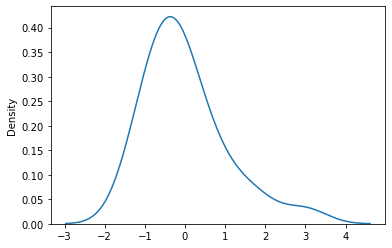

In [287]:
sns.kdeplot(scaled_df_bc_znormalised[:,24])

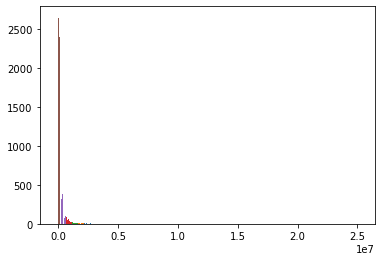

In [256]:
import matplotlib.pyplot as plt

x = np_corrected
plt.hist(x, bins = 100)
plt.show()


In [281]:
#distribution of log transformed_batchcorrected data 
z = scaled_df_bc_znormalised
plt.hist(z, bins = 30)
plt.show()

KeyboardInterrupt: 